In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Mvir vs Mgal

In [2]:
#r50, r90, rgal, M90, Mgal, Mgas, Mvir, A2max, Rmax, krot
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

gasoline=np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd_/sem2/param_galaxy.dat')

Mgal_gs =gasoline[:,4]
Mvir_gs =gasoline[:,6]

gadget=np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd_/sem2/parametros.dat')

Mgal_gd =gadget[:,4]
Mvir_gd =gadget[:,6]

masa_obs=np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd_/sem2/masas_obs.dat')
masa_vir = masa_obs[:,0]
xerror = masa_obs[:,1]
masa_gal = masa_obs[:,2]
yerror = masa_obs[:,3]

xerr_high = log10(1+xerror/masa_vir)
xerr_low = log10(masa_vir/(masa_vir-xerror))
yerr_high = log10(1+yerror/masa_gal)
yerr_low = log10(masa_gal/(masa_gal-yerror))

masa_vir = log10(masa_vir)
masa_gal = log10(masa_gal)
  
c = 0.129
M0 = 10**11.4
alpha = 0.926
beta = 0.261
gamma = 2.440
MM = arange (10,13,0.05)
M_vir = 10**MM

vector1 = (1,2,4)
vector2 = ('00','01','03')
vector3 = ('M31','MW','M33')
vec = ('blue', 'red', 'green')


#------------------curva de Guo et al 2010-------------------
c1 = (M_vir/M0)**(-alpha)
c2 = (M_vir/M0)**beta
M_estrella = M_vir * c * ((c1+c2)**(-gamma))

Me=log10(M_estrella)

#-------fraccion de bariones universal--------------------
MM1 = arange (10, 12.5, 0.05)
fbar = 0.0418/0.24
Mbar = fbar * 10**MM1

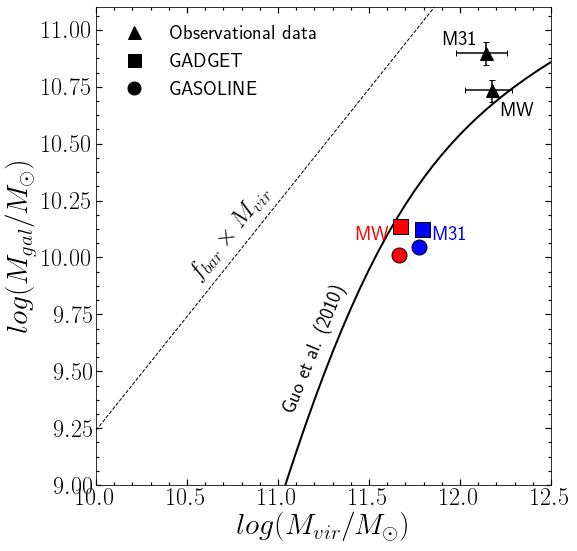

In [3]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.plot(MM,Me,'k', lw=2)
ax1.plot(MM1,log10(Mbar),'--', lw=1, color ='k')
ax1.set_ylim(9,11.1)
ax1.set_xlim(10,12.5)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax1.set_xlabel(r'$log(M_{vir}/M_{\odot})$', fontsize=30)
ax1.set_ylabel(r'$log(M_{gal}/M_{\odot})$', fontsize=30)
plt.text(x = 11.2, y = 9.6, s = u'Guo et al. (2010)', fontsize = 20, rotation= 68,  style='italic',
         verticalalignment = 'center', horizontalalignment = 'center')
plt.text(x = 10.75, y = 10.1, s = r'$f_{bar}\times M_{vir}$', fontsize = 25, rotation= 51,
         verticalalignment = 'center', horizontalalignment = 'center')
plt.text(11.95,10.1, 'M31', fontsize=20, color='blue', ha='center', va='center')
plt.text(11.52,10.1, 'MW', fontsize=20, color='red', ha='center', va='center')
# plt.text(11.25,9.77, 'M33', fontsize=20, color='green', ha='center', va='center')

ax1.errorbar(masa_vir[:2],masa_gal[:2],xerr=[xerr_low[:2],xerr_high[:2]] ,
                 yerr=[yerr_low[:2],yerr_high[:2]], color='k', fmt='^', markersize=13, capsize=3)
#print masa_vir, masa_gal, xerr_low, xerr_high, yerr_low, yerr_high
for i in range(0,2):
    ax1.plot(Mvir_gd[i],Mgal_gd[i],'s', markersize=15, color=vec[i], label = 'Gadget', mec='k')
    ax1.plot(Mvir_gs[i],Mgal_gs[i],'o', markersize=15, color=vec[i], label= 'Gasoline',mec='k')
    if i ==1:
        plt.text(masa_vir[i]+0.05,masa_gal[i]-0.09, '%s'%vector3[i], 
                 fontsize=20, color='k', ha='left', va='center')
    else:
            plt.text(masa_vir[i]-0.04,masa_gal[i]+0.06, '%s'%vector3[i], 
                 fontsize=20, color='k', ha='right', va='center')
        
handles, labels = ax1.get_legend_handles_labels()
#Create custom artists
Gadget = plt.Line2D((0,1),(0,0), color='k', marker='s', linestyle='',markersize=13)
Gasoline = plt.Line2D((0,1),(0,0), color='k', marker ='o', linestyle='',markersize=13)
Observacional = plt.Line2D((0,1),(0,0), color='k', marker ='^', linestyle='',markersize=13)
#Create legend from custom artist/label lists
ax1.legend([Observacional, Gadget,Gasoline],['Observational data ','GADGET', 'GASOLINE'],
           fontsize=20, frameon=False, loc=2, numpoints=1 )

    #plt.legend(handles=[gadget,gasoline],fontsize=12, frameon=False, loc=2, numpoints=1)
           #handler_map={gadget: HandlerLine2D(numpoints=1), gasoline: HandlerLine2D(numpoints=1)})
fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Mgal_Mvir.pdf', dpi = 100)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_01.pdf', dpi = 100)
#fig.savefig('/home/ornela/Escritorio/presentacion_final/Mgal_Mvir.png', dpi = 100)
plt.show()

In [12]:
x = np.array([1,2,3])
y = np.array([1,2,3])
print x+y 

[2 4 6]


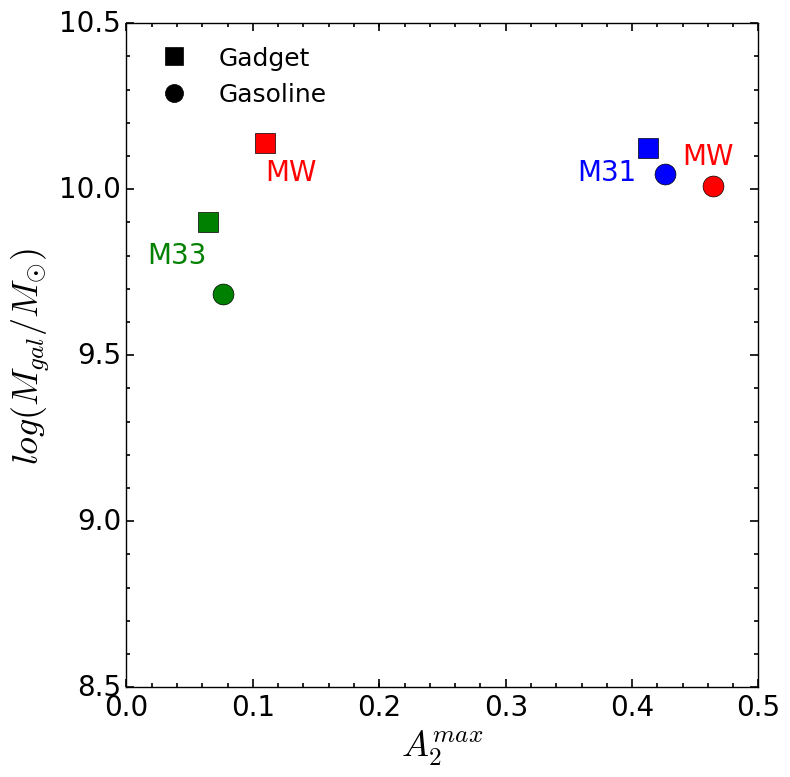

In [10]:
# Graficamos Mgal vs A2max
#r50, r90, rgal, M90, Mgal, Mgas, Mvir, A2max, Rmax, krot
import matplotlib.pyplot as plt

gasoline=np.loadtxt('/home/ornela/python/sem2/param_galaxy.dat')

Mgal_gs =gasoline[:,4]
A2max_gs =gasoline[:,7]

gadget=np.loadtxt('/home/ornela/python/sem2/parametros.dat')

Mgal_gd =gadget[:,4]
A2max_gd =gadget[:,7]


vector1 = (1,2,4)
vector2 = ('00','01','03')
vector3 = ('M31','MW','M33')
vec = ('blue', 'red', 'green')

#---------------------------------------------------------
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.set_xlim(0,0.5)
ax1.set_ylim(8.5,10.5)
ax1.minorticks_on()
ax1.tick_params( labelsize=20)
ax1.tick_params('both', length=3, width=1.2,which='minor')
ax1.tick_params('both', length=6, width=1.2,which='major')  
ax1.set_xlabel(r'$A_{2}^{max}$',fontsize=26)
ax1.set_ylabel(r'$log(M_{gal}/M_{\odot})$', fontsize=26)
plt.text(0.38,10.05, 'M31', fontsize=20, color='blue', ha='center', va='center')
plt.text(0.13,10.05, 'MW', fontsize=20, color='red', ha='center', va='center')
plt.text(0.46,10.1, 'MW', fontsize=20, color='red', ha='center', va='center')
plt.text(0.04,9.8, 'M33', fontsize=20, color='green', ha='center', va='center')

for i in range(0,3):
        gadget, = ax1.plot(A2max_gd[i],Mgal_gd[i],'s', markersize=15, color=vec[i], label='Gadget')
        gasoline, = ax1.plot(A2max_gs[i],Mgal_gs[i],'o', markersize=15, color=vec[i], label = 'Gasoline')
        #plt.text(0.4, 10.4-0.08*i, '%s'%vector3[i], fontsize=15, color=vec[i], ha='left', va='center')
        
#plt.legend(handles=[gadget,gasoline],fontsize=12, frameon=False, loc=2, numpoints=1)
handles, labels = ax1.get_legend_handles_labels()
#Create custom artists
Gadget = plt.Line2D((0,1),(0,0), color='k', marker='s', linestyle='',markersize=13)
Gasoline = plt.Line2D((0,1),(0,0), color='k', marker ='o', linestyle='',markersize=13)

#Create legend from custom artist/label lists
ax1.legend([Gadget,Gasoline],['Gadget', 'Gasoline'],fontsize=18, frameon=False, loc=2, numpoints=1 )

#fig.savefig('/home/ornela/Escritorio/seminario2/imagenes/Mgal_A2max.png', dpi = 100)
fig.savefig('/home/ornela/Materias/trabajo_final/mi_tesis/Figures/Mgal_A2max.png', dpi = 100)
plt.show()

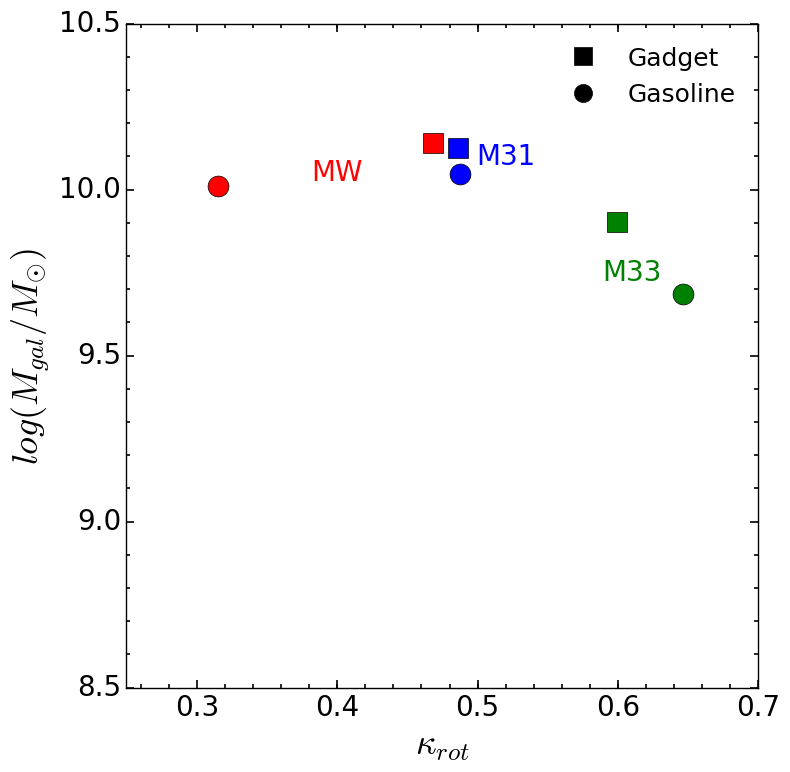

In [11]:
# Graficamos Mgal vs krot
#r50, r90, rgal, M90, Mgal, Mgas, Mvir, A2max, Rmax, krot
import matplotlib.pyplot as plt

gasoline=np.loadtxt('/home/ornela/python/sem2/param_galaxy.dat')

Mgal_gs =gasoline[:,4]
krot_gs =gasoline[:,9]

gadget=np.loadtxt('/home/ornela/python/sem2/parametros.dat')

Mgal_gd =gadget[:,4]
krot_gd =gadget[:,9]


vector1 = (1,2,4)
vector2 = ('00','01','03')
vector3 = ('M31','MW','M33')
vec = ('blue', 'red', 'green')

#---------------------------------------------------------
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.set_ylim(8.5,10.5)
ax1.set_xlim(0.25,0.7)
ax1.minorticks_on()
ax1.tick_params( labelsize=20)
ax1.tick_params('both', length=3, width=1.2,which='minor')
ax1.tick_params('both', length=6, width=1.2,which='major')  
ax1.set_xlabel(r'$\kappa_{rot}$',fontsize=26)
ax1.set_ylabel(r'$log(M_{gal}/M_{\odot})$', fontsize=26)
plt.text(0.52,10.1, 'M31', fontsize=20, color='blue', ha='center', va='center')
plt.text(0.4,10.05, 'MW', fontsize=20, color='red', ha='center', va='center')
#plt.text(0.46,10.1, 'MW', fontsize=20, color='red', ha='center', va='center')
plt.text(0.61,9.75, 'M33', fontsize=20, color='green', ha='center', va='center')

for i in range(0,3):
        gadget,= ax1.plot(krot_gd[i],Mgal_gd[i],'s', markersize=15, color=vec[i], label = 'Gadget')
        gasoline, = ax1.plot(krot_gs[i],Mgal_gs[i],'o', markersize=15, color=vec[i], label = 'Gasoline')
        #plt.text(0.63, 10.2-0.08*i, '%s'%vector3[i], fontsize=15, color=vec[i], ha='left', va='center')
        
#plt.legend(handles=[gadget,gasoline],fontsize=12, frameon=False, loc=1, numpoints=1)
handles, labels = ax1.get_legend_handles_labels()
#Create custom artists
Gadget = plt.Line2D((0,1),(0,0), color='k', marker='s', linestyle='',markersize=13)
Gasoline = plt.Line2D((0,1),(0,0), color='k', marker ='o', linestyle='',markersize=13)

#Create legend from custom artist/label lists
ax1.legend([Gadget,Gasoline],['Gadget', 'Gasoline'],fontsize=18, frameon=False, loc=1, numpoints=1 )

#fig.savefig('/home/ornela/Escritorio/seminario2/imagenes/Mgal_krot.png', dpi = 100)
fig.savefig('/home/ornela/Materias/trabajo_final/mi_tesis/Figures//Mgal_krot.png', dpi = 100)
plt.show()

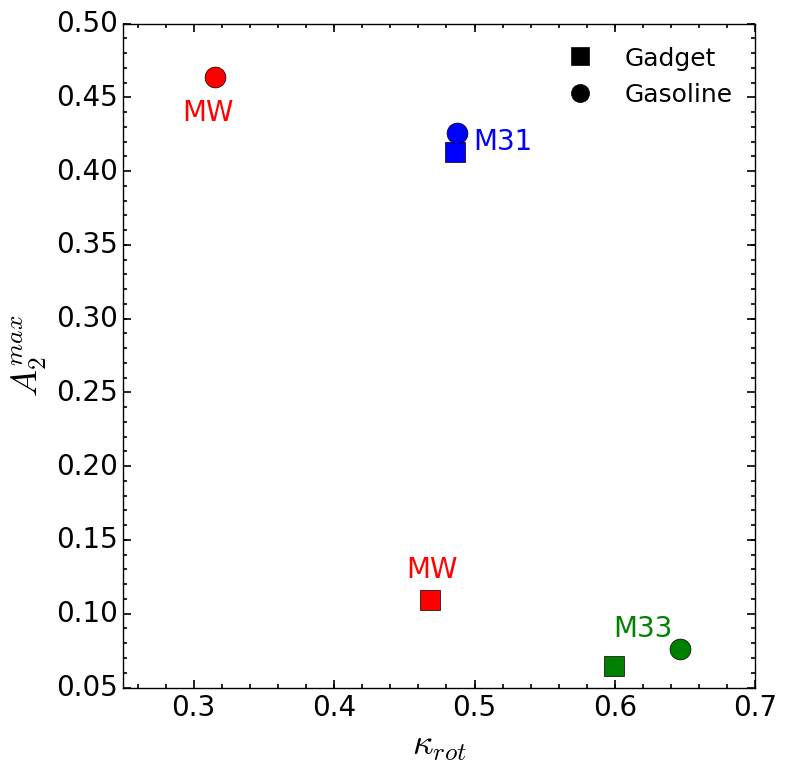

In [12]:
# Graficamos A2max vs krot
#r50, r90, rgal, M90, Mgal, Mgas, Mvir, A2max, Rmax, krot
import matplotlib.pyplot as plt

gasoline=np.loadtxt('/home/ornela/python/sem2/param_galaxy.dat')

A2max_gs =gasoline[:,7]
krot_gs =gasoline[:,9]

gadget=np.loadtxt('/home/ornela/python/sem2/parametros.dat')

A2max_gd =gadget[:,7]
krot_gd =gadget[:,9]


vector1 = (1,2,4)
vector2 = ('00','01','03')
vector3 = ('M31','MW','M33')
vec = ('blue', 'red', 'green')

#---------------------------------------------------------
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
#ax1.set_xlim(9.65,10.1)
ax1.set_xlim(0.25,0.7)
ax1.minorticks_on()
ax1.tick_params( labelsize=20)
ax1.tick_params('both', length=3, width=1.2,which='minor')
ax1.tick_params('both', length=6, width=1.2,which='major')  
ax1.set_xlabel(r'$\kappa_{rot}$',fontsize=26)
ax1.set_ylabel(r'$A_{2}^{max}$',fontsize=26)
plt.text(0.52,0.42, 'M31', fontsize=20, color='blue', ha='center', va='center')
plt.text(0.31,0.44, 'MW', fontsize=20, color='red', ha='center', va='center')
plt.text(0.47,0.13, 'MW', fontsize=20, color='red', ha='center', va='center')
plt.text(0.62,0.09, 'M33', fontsize=20, color='green', ha='center', va='center')

for i in range(0,3):
        gadget,= ax1.plot(krot_gd[i],A2max_gd[i],'s', markersize=15, color=vec[i], label='Gadget')
        gasoline,= ax1.plot(krot_gs[i],A2max_gs[i],'o', markersize=15, color=vec[i],label ='Gasoline')
        #plt.text(0.63, 0.44-0.02*i, '%s'%vector3[i], fontsize=15, color=vec[i], ha='left', va='center')
        
#plt.legend(handles=[gadget,gasoline],fontsize=12, frameon=False, loc=1, numpoints=1)

handles, labels = ax1.get_legend_handles_labels()
#Create custom artists
Gadget = plt.Line2D((0,1),(0,0), color='k', marker='s', linestyle='',markersize=13)
Gasoline = plt.Line2D((0,1),(0,0), color='k', marker ='o', linestyle='',markersize=13)

#Create legend from custom artist/label lists
ax1.legend([Gadget,Gasoline],['Gadget', 'Gasoline'],fontsize=18, frameon=False, loc=1, numpoints=1 )
fig.savefig('/home/ornela/Materias/trabajo_final/mi_tesis/Figures//A2max_krot.png', dpi = 100)
plt.show()

In [26]:
?plt.legend

In [3]:
#r50, r90, rgal, M90, Mgal, Mgas, Mvir, A2max, Rmax, krot
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

gasoline=np.loadtxt('/home/ornela/python/sem2/param_galaxy.dat')

Mgal_gs =gasoline[:,4]
Mvir_gs =gasoline[:,6]

gadget=np.loadtxt('/home/ornela/python/sem2/parametros.dat')

Mgal_gd =gadget[:,4]
Mvir_gd =gadget[:,6]

print 'Mgal=', 10**(Mgal_gd), 10**(Mgal_gs)
print 'Mvir=', 10**(Mvir_gd), 10**(Mvir_gs)

Mgal= [  1.33247479e+10   1.37706360e+10   7.97623609e+09] [  1.11385331e+10   1.02515846e+10   4.84073156e+09]
Mvir= [  6.14456298e+11   4.68533879e+11   2.35939688e+11] [  5.92978572e+11   4.58974968e+11   2.27561087e+11]


In [ ]:
## evolucion

In [3]:
#funcion conv para pasar tiempo de redshift a Gyr
import numpy as np

def conv(z, h, omega_lambda, omega_matter):

    H0=100*h
#conversion Mpc --> km
    conv1=1./(1e6*206265*1.496e8)
#conversion de s --> Gyr
    conv2=3600*24*365.25*1e9
    H0=H0*conv1*conv2

    c1=np.sqrt(omega_lambda*(1.+z)**(-3.))+np.sqrt((omega_lambda*(1.+z)**(-3.))+omega_matter)
    ln=np.log(c1/np.sqrt(omega_matter))
    c2=2./(3.*np.sqrt(omega_lambda))
        
    time = (1./H0)*c2*ln

    return time

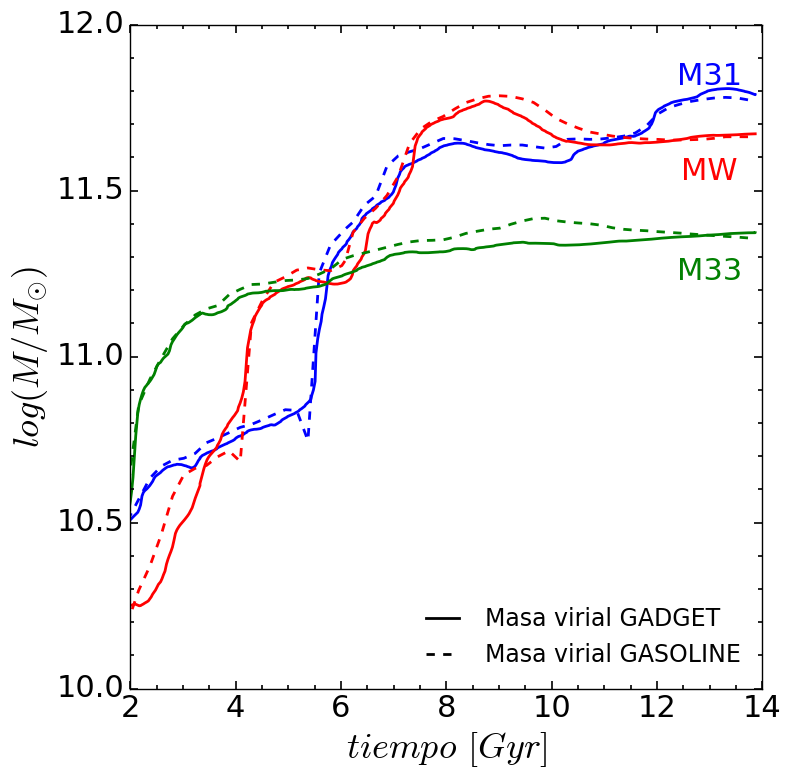

In [6]:
# Grafico de time vs Mgal
#t, A2max, krot, Mgal, Mgas
import matplotlib.pyplot as plt

vector = ('00','01','03')
vector2=(1,2,4)
vec2 = ('blue', 'red', 'green')
vector3=('M31', 'MW', 'M33')
j=0
 
for i in range(0,3):

    cm=np.loadtxt('/home/ornela/python/sem2/A2-krot-s'+'%s' %vector[i]+'.dat')
    cm2=np.loadtxt('/home/ornela/python/erebos/A2-krot-s'+'%s' %vector2[i]+'.dat')
    
    t1=cm[:,0]
    t2=cm2[:,0]
    Mvir_GD=cm[:,8]
    Mvir_GS=cm2[:,8]
    
    time1 =[]
    time2 =[]
    m_vir_gd=[]
    m_vir_gs=[]
    aux1=range(0,len(t1),1)
    aux2=range(0,len(t2),1)
    
    for j in aux1:
        time1.append(t1[j])
        m_vir_gd.append(Mvir_GD[j])
    
    for j in aux2:
        time2.append(t2[j])
        m_vir_gs.append(Mvir_GS[j])
    
    fig = plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax0=fig.add_subplot(111)
    #ax0.plot(time,m_gal,'--', lw=2, color = '%s'%vec2[i], label= 'Masa estrellas')
    #ax0.plot(time,m_gas,'k', lw=1, color = '%s'%vec2[i], label = 'Masa gas')
    #ax0.plot(time,m_drk,':', lw=3, color = '%s'%vec2[i], label='Masa materia oscura')
    ax0.plot(time1,m_vir_gd,'k', lw=2, color = '%s'%vec2[i], label='Masa virial GADGET')
    ax0.plot(time2,m_vir_gs,'--', lw=2, color = '%s'%vec2[i], label='Masa virial GASOLINE')
    ax0.set_ylim(10,12)
    ax0.set_xlim(2,14)
    ax0.set_xlabel(u'$tiempo$ $[Gyr]$', fontsize=26)
    ax0.set_ylabel(u'$log(M/M_{\odot})$', fontsize=26)
    ax0.minorticks_on()
    ax0.tick_params( labelsize=22)
    ax0.tick_params('both', length=3, width=1.2,which='minor')
    ax0.tick_params('both', length=6, width=1.2,which='major')
    
handles, labels = ax0.get_legend_handles_labels()
#Create custom artists
#Estrellas = plt.Line2D((0,1),(0,0), color='k', linestyle='--',lw=2)
#Gas = plt.Line2D((0,1),(0,0), color='k', linestyle='-', lw=1)
#M_oscura = plt.Line2D((0,1),(0,0), color='k',  linestyle=':', lw=2)
M_virial1 = plt.Line2D((0,1),(0,0), color='k',  linestyle='-', lw=2)
M_virial2 = plt.Line2D((0,1),(0,0), color='k',  linestyle='--', lw=2)
#Create legend from custom artist/label lists
ax0.legend([M_virial1, M_virial2],['Masa virial GADGET','Masa virial GASOLINE'],
           fontsize=17, frameon=False, loc=4, numpoints=4)

    
#plt.text(x=4 , y=11.8 , s = 'GADGET',color ='k',fontsize = 22, va = 'center', ha = 'center')

#plt.text(x=3 , y=11.4 , s = '$Masa\:virial$',color ='k',fontsize = 22, va = 'center', ha = 'left')
#plt.text(x=8.5 , y=10 , s = 'M31',color ='blue',fontsize = 22, va = 'center', ha = 'center',rotation= 15)
#plt.text(x=11 , y=10.1 , s = 'MW',color ='red',fontsize = 22, va = 'bottom', ha = 'center')
#plt.text(x=4 , y=9.8 , s = 'M33',color ='green',fontsize = 22, va = 'top', ha = 'center',rotation= 15)

#plt.text(x=3 , y=9.9 , s = '$Masa\:estelar$',color ='k',fontsize = 22, va = 'center', ha = 'left')
plt.text(x=13 , y=11.8 , s = 'M31',color ='blue',fontsize = 22, va = 'bottom', ha = 'center')
plt.text(x=13 , y=11.6 , s = 'MW',color ='red',fontsize = 22, va = 'top', ha = 'center')
plt.text(x=13 , y=11.3 , s = 'M33',color ='green',fontsize = 22, va = 'top', ha = 'center')
#fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GD_time_vs_Mgal-vir.png', dpi = 100)
plt.show()
